In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


In [78]:
df_credits = pd.read_csv("https://raw.githubusercontent.com/harshitcodes/tmdb_movie_data_analysis/master/tmdb-5000-movie-dataset/tmdb_5000_credits.csv")

In [79]:
df_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [80]:
df_movies = pd.read_csv("https://raw.githubusercontent.com/harshitcodes/tmdb_movie_data_analysis/master/tmdb-5000-movie-dataset/tmdb_5000_movies.csv")

In [81]:
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [82]:
df_credits.columns=['id', 'title', 'cast', 'crew']

In [83]:
df_movies.drop(['title'], axis=1, inplace=True)

In [84]:
df_movielens=pd.merge(df_credits, df_movies, on='id')

In [85]:
df_movielens.head(2)

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500


**revenue, runtime, vote_average, vote_count, popularity, budget **

In [86]:
df_movielens.shape

(4803, 22)

In [87]:
df_movielens.columns

Index(['id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [88]:
df_movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [89]:
df_movielens.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [90]:
df_movielens.isnull().sum()

id                         0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

In [91]:
df_movielens = df_movielens.drop('homepage', axis=1)

In [92]:
df_movielens['budget'].fillna(df_movielens['budget'].median(),inplace=True)

In [93]:
df_movielens = df_movielens.drop('release_date', axis=1)

In [94]:
df_movielens['runtime'].fillna(df_movielens['runtime'].mean(),inplace=True)

In [95]:
df_movielens['tagline'].replace('NaN', inplace=True)

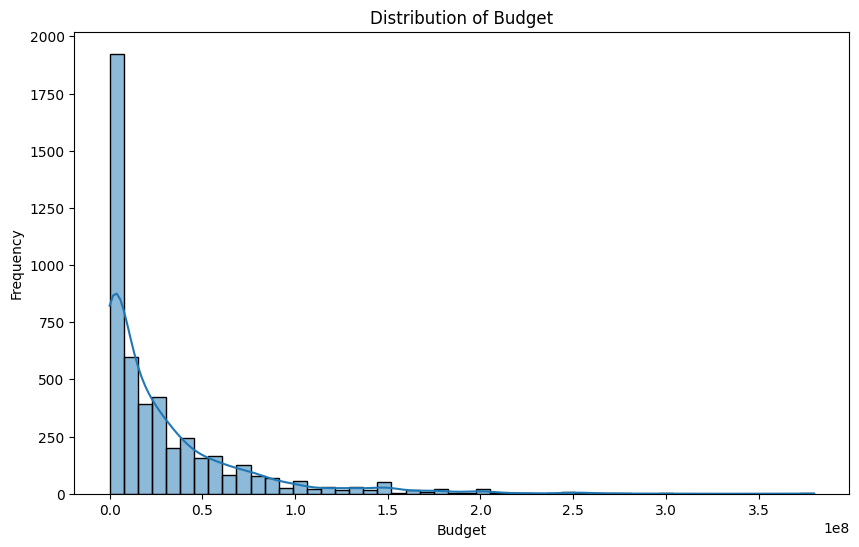

In [96]:
plt.figure(figsize=(10,6))
sns.histplot(df_movielens['budget'].dropna(),bins=50, kde=True)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

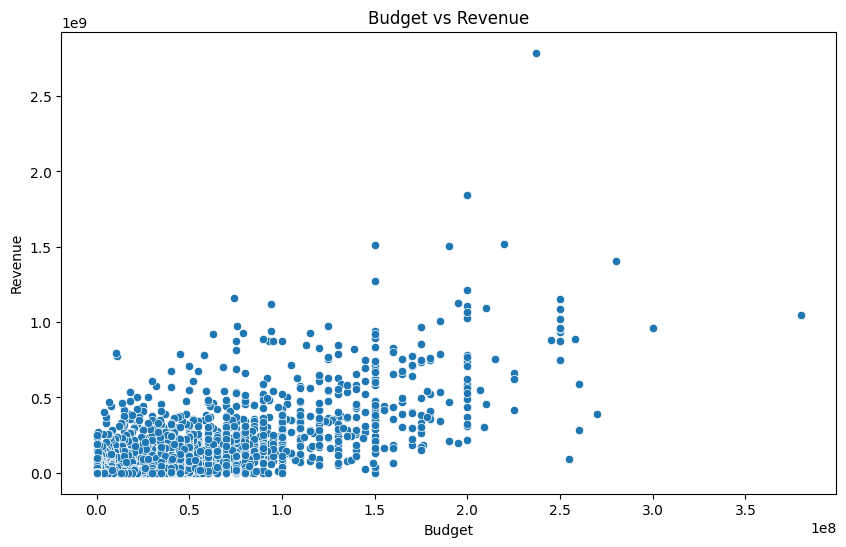

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_movielens, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

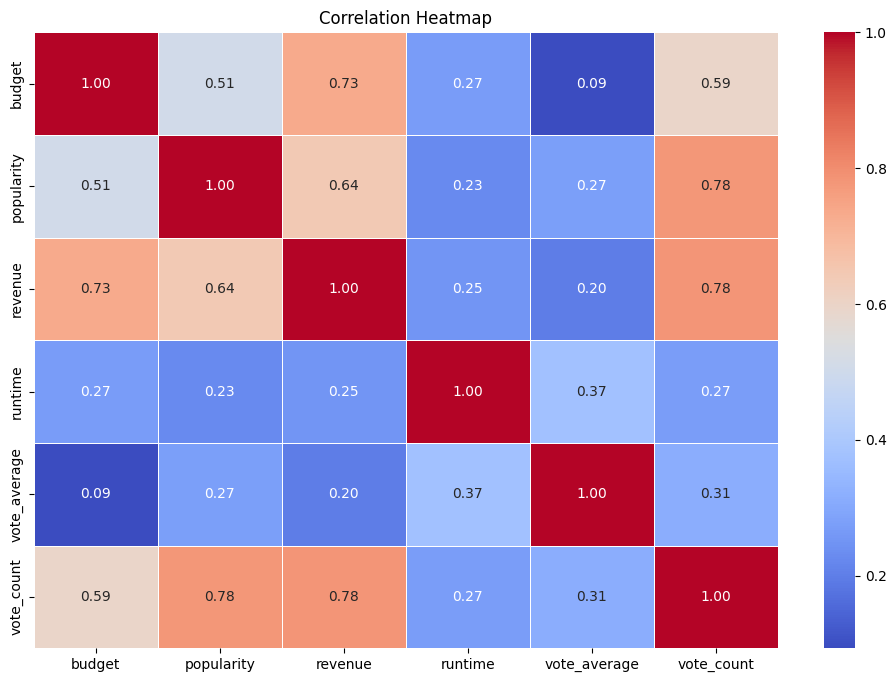

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(df_movielens[['budget', 'popularity','revenue', 'runtime',
       'vote_average', 'vote_count']].corr(), annot=True, cmap='coolwarm', fmt='0.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-99-5b4d66f9d2ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_movielens, x='original_language', palette='Set2', order=df_movielens['original_language'].value_counts().index)


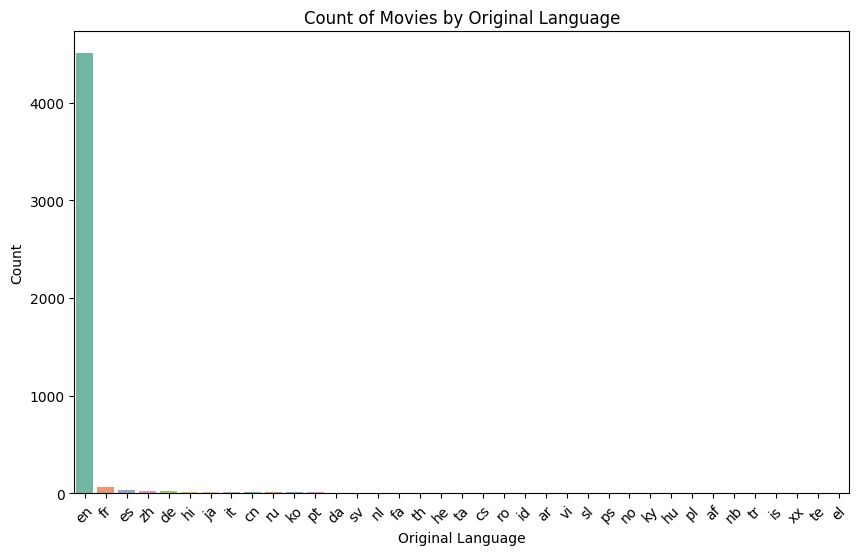

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_movielens, x='original_language', palette='Set2', order=df_movielens['original_language'].value_counts().index)
plt.title('Count of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [100]:
df_movielens.columns

Index(['id', 'title', 'cast', 'crew', 'budget', 'genres', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [101]:
df_movielens['overview'].isnull().sum()

3

In [102]:
# Finding the row(s) where 'The Giver' is in the title column
giver_rows = df_movies[df_movies['original_title'] == 'The Godfather']

# Displaying the row(s)
print(giver_rows['overview'])


print(df_movies.loc[1874, 'overview'])

3337    Spanning the years 1945 to 1955, a chronicle o...
Name: overview, dtype: object
A drama with fairy tale elements, where an orphaned musical prodigy uses his gift as a clue to finding his birth parents.


In [103]:
# Finding the row(s) where 'The Giver' is in the title column



print(df_movies.loc[3027, 'overview'])

Holly is tired of moving every time her mom Jean breaks up with yet another second-rate guy. To distract her mother from her latest bad choice, Holly conceives the perfect plan for the perfect man, an imaginary secret admirer who will romance Jean and boost her self-esteem.


In [104]:
df_movielens['overview'].fillna(' ', inplace=True)

In [105]:
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(df_movielens['overview'])
print(tfidfv_matrix.todense())
tfidfv_matrix.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4803, 20978)

In [106]:
cosine_sim1 = linear_kernel(tfidfv_matrix, tfidfv_matrix)

In [107]:
cosine_sim1.shape

(4803, 4803)

In [108]:
indices = pd.Series(data=list(df_movielens.index), index=df_movielens['title'] )

In [109]:
indices.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [110]:
def content_recc(title, cosine_sim):
  idx = indices[title]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores.sort(key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  ind=[]
  for (x,y) in sim_scores:
    ind.append(x)
  tit=[]
  for x in ind:
    tit.append(df_movielens.iloc[x]['title'])
  return pd.Series(data=tit, index=ind)


In [113]:
def content_recc(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies (excluding the first one which is the same movie)
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    ind = [x for (x, y) in sim_scores]

    # Get the movie details for the most similar movies
    recommendations = []
    for x in ind:
        recommendations.append({
            'title': df_movielens.iloc[x]['title'],
            'keywords': df_movielens.iloc[x]['keywords'],
            'cast': df_movielens.iloc[x]['cast'],
            #'director': df_movielens.iloc[x]['director'],
            'genres': df_movielens.iloc[x]['genres']
        })

    return pd.DataFrame(recommendations, index=ind)

In [114]:
content_recc('The Giver', cosine_sim1)

,title,keywords,cast,genres
1588,P.S. I Love You,"[{""id"": 906, ""name"": ""job-hopping""}, {""id"": 12...","[{""cast_id"": 19, ""character"": ""Holly"", ""credit...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n..."
3312,Hostel: Part II,"[{""id"": 3530, ""name"": ""prague""}, {""id"": 3540, ...","[{""cast_id"": 13, ""character"": ""Beth"", ""credit_...","[{""id"": 27, ""name"": ""Horror""}]"
3881,Beginners,"[{""id"": 237, ""name"": ""gay""}, {""id"": 936, ""name...","[{""cast_id"": 3, ""character"": ""Oliver Fields"", ...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n..."
1154,Fifty Shades of Grey,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""Anastasia Steele...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n..."
3649,"Lovely, Still","[{""id"": 10183, ""name"": ""independent film""}]","[{""cast_id"": 1, ""character"": ""Robert Malone"", ...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n..."
2713,The Lucky Ones,"[{""id"": 6054, ""name"": ""friendship""}, {""id"": 60...","[{""cast_id"": 4, ""character"": ""Fred Cheaver"", ""...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
3029,Kung Pow: Enter the Fist,"[{""id"": 1465, ""name"": ""loss of family""}, {""id""...","[{""cast_id"": 2, ""character"": ""\""Master Tang\""""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam..."
3092,The Joneses,"[{""id"": 10183, ""name"": ""independent film""}, {""...","[{""cast_id"": 4, ""character"": ""Steve Jones"", ""c...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
3139,Adventureland,"[{""id"": 10267, ""name"": ""comedy""}, {""id"": 11509...","[{""cast_id"": 1, ""character"": ""James Brennan"", ...","[{""id"": 35, ""name"": ""Comedy""}]"
3027,The Perfect Man,"[{""id"": 456, ""name"": ""mother""}, {""id"": 5756, ""...","[{""cast_id"": 1, ""character"": ""Holly Hamilton"",...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."


In [115]:
content_recc('Big Hero 6', cosine_sim1)

,title,keywords,cast,genres
3917,Phat Girlz,"[{""id"": 187056, ""name"": ""woman director""}]","[{""cast_id"": 1, ""character"": ""Jazmin Biltmore""...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
1008,Chappie,"[{""id"": 310, ""name"": ""artificial intelligence""...","[{""cast_id"": 2, ""character"": ""Chappie"", ""credi...","[{""id"": 80, ""name"": ""Crime""}, {""id"": 28, ""name..."
170,The World Is Not Enough,"[{""id"": 6731, ""name"": ""british""}, {""id"": 10364...","[{""cast_id"": 4, ""character"": ""James Bond"", ""cr...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."
4148,Coffee Town,"[{""id"": 5483, ""name"": ""coffee shop""}, {""id"": 8...","[{""cast_id"": 7, ""character"": ""Will"", ""credit_i...","[{""id"": 35, ""name"": ""Comedy""}]"
711,RED,"[{""id"": 591, ""name"": ""cia""}, {""id"": 4948, ""nam...","[{""cast_id"": 4, ""character"": ""Frank Moses"", ""c...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
2238,Bandslam,"[{""id"": 586, ""name"": ""new jersey""}, {""id"": 434...","[{""cast_id"": 69, ""character"": ""Sam"", ""credit_i...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
375,Bicentennial Man,"[{""id"": 803, ""name"": ""android""}, {""id"": 3249, ...","[{""cast_id"": 1, ""character"": ""Andrew Martin"", ...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 878, ""na..."
1343,Never Say Never Again,"[{""id"": 282, ""name"": ""video game""}, {""id"": 470...","[{""cast_id"": 2, ""character"": ""James Bond"", ""cr...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."
3434,A Home at the End of the World,"[{""id"": 237, ""name"": ""gay""}, {""id"": 740, ""name...","[{""cast_id"": 1, ""character"": ""Bobby Morrow (19...","[{""id"": 10749, ""name"": ""Romance""}, {""id"": 18, ..."
1874,August Rush,"[{""id"": 248, ""name"": ""date""}, {""id"": 697, ""nam...","[{""cast_id"": 12, ""character"": ""August Rush"", ""...","[{""id"": 18, ""name"": ""Drama""}]"


In [116]:
type(df_movielens['cast'].iloc[0])

str

In [117]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
  df_movielens[feature] = df_movielens[feature].apply(literal_eval)

In [118]:
type(df_movielens['cast'].iloc[0])

list

In [119]:
def get_dir(x):
  for a in x:
    if a['job']=='Director':
      return a['name']
  return 'NaN'

In [120]:
def get_top3(x):
  new=[]
  for a in x[:3]:
    new.append(a['name'])
  return new

  return []

In [121]:
df_movielens['director']=df_movielens['crew'].apply(lambda x: get_dir(x))

In [122]:
df_movielens['actor']=df_movielens['cast'].apply(lambda x: get_top3(x))

In [123]:
df_movielens['genres']=df_movielens['genres'].apply(lambda x: get_top3(x))

In [124]:
df_movielens['keywords']=df_movielens['keywords'].apply(lambda x: get_top3(x))

In [125]:
df_movielens[['title', 'actor', 'director', 'keywords', 'genres']].head(3)

,title,actor,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [126]:
def clean_dir(x):
  return x.lower().replace(' ','')


In [127]:
def clean_top3(x):
  new=[]
  for a in x:
    new.append(a.lower().replace(' ',''))
  return new

In [128]:
df_movielens['director']=df_movielens['director'].apply(lambda x:clean_dir(x))

In [129]:
df_movielens['actor']=df_movielens['actor'].apply(lambda x:clean_top3(x))

In [130]:
df_movielens['keywords']=df_movielens['keywords'].apply(lambda x:clean_top3(x))

In [131]:
df_movielens['genres']=df_movielens['genres'].apply(lambda x:clean_top3(x))

In [132]:
df_movielens[['title', 'actor', 'director', 'keywords', 'genres']].head(3)

,title,actor,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [133]:
def create_soup(x):
  return ' '.join(x['keywords']) + ' ' + ' ' .join(x['actor']) + ' ' + x['director'] + ' ' + ' ' .join(x['genres'])

In [134]:
df_movielens['soup'] = df_movielens.apply(create_soup, axis=1)

In [135]:


cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df_movielens['soup'])

In [136]:
cosine_sim2 = cosine_similarity(cv_matrix, cv_matrix)

In [137]:
content_recc('Love Actually', cosine_sim2)

,title,keywords,cast,genres
1638,Love & Other Drugs,"[malenudity, femalenudity, letter]","[{'cast_id': 2, 'character': 'Jamie Randall', ...","[drama, comedy, romance]"
3520,Bend It Like Beckham,"[londonengland, tradition, indianlead]","[{'cast_id': 33, 'character': 'Jesminder 'Jess...","[comedy, drama, romance]"
4247,Me You and Five Bucks,[],[],"[romance, comedy, drama]"
3456,National Lampoon’s Van Wilder,"[malenudity, femalenudity, sex]","[{'cast_id': 1, 'character': 'Van Wilder', 'cr...","[comedy, romance]"
1120,Notting Hill,"[londonengland, bookshop, birthday]","[{'cast_id': 11, 'character': 'Anna Scott', 'c...","[romance, comedy, drama]"
1526,Going the Distance,"[malenudity, sex, sanfrancisco]","[{'cast_id': 3, 'character': 'Erin Rankin Lang...","[comedy, drama, romance]"
1756,About a Boy,"[londonengland, rockandroll, singleparent]","[{'cast_id': 7, 'character': 'Will', 'credit_i...","[drama, comedy, romance]"
1831,Bridget Jones's Diary,"[holiday, londonengland, england]","[{'cast_id': 1, 'character': 'Bridget Jones', ...","[comedy, romance, drama]"
2862,About Time,"[londonengland, fathersonrelationship, timetra...","[{'cast_id': 7, 'character': 'Tim', 'credit_id...","[comedy, drama, sciencefiction]"
3055,Seeking a Friend for the End of the World,"[asteroid, roadtrip, endoftheworld]","[{'cast_id': 3, 'character': 'Dodge Petersen',...","[comedy, drama, romance]"


In [155]:
content_recc('The Godfather', cosine_sim2)

,title,keywords,cast,genres
867,The Godfather: Part III,"[italy, christianity, newyork]","[{'cast_id': 1, 'character': 'Don Michael Corl...","[crime, drama, thriller]"
2731,The Godfather: Part II,"[italo-american, cuba, vororte]","[{'cast_id': 8, 'character': 'Don Michael Corl...","[drama, crime]"
2649,The Son of No One,[],"[{'cast_id': 3, 'character': 'Jonathan White',...","[drama, thriller, crime]"
1525,Apocalypse Now,"[guerrilla, river, vietnam]","[{'cast_id': 29, 'character': 'Captain Benjami...","[drama, war]"
4638,Amidst the Devil's Wings,[],[],"[drama, action, crime]"
1018,The Cotton Club,"[jazz, jazzmusician, musical]","[{'cast_id': 17, 'character': 'Dixie Dwyer', '...","[music, drama, crime]"
1170,The Talented Mr. Ripley,"[venice, italy, gay]","[{'cast_id': 24, 'character': 'Tom Ripley', 'c...","[thriller, crime, drama]"
1209,The Rainmaker,"[jurors, proof, courtcase]","[{'cast_id': 12, 'character': 'Rudy Baylor', '...","[drama, crime, thriller]"
1394,Donnie Brasco,"[undercover, colombia, mafia]","[{'cast_id': 2, 'character': 'Donnie Brasco / ...","[crime, drama, thriller]"
1850,Scarface,"[miami, corruption, capitalism]","[{'cast_id': 9, 'character': 'Tony Montana', '...","[action, crime, drama]"


In [139]:
content_recc('Scarface', cosine_sim2)

,title,keywords,cast,genres
4638,Amidst the Devil's Wings,[],[],"[drama, action, crime]"
2240,A Most Violent Year,"[corruption, capitalism, winter]","[{'cast_id': 4, 'character': 'Abel Morales', '...","[crime, drama, thriller]"
2543,Cop Land,"[corruption, newjersey, handcuffs]","[{'cast_id': 15, 'character': 'Sheriff Freddy ...","[action, crime, drama]"
2609,Dark Blue,"[corruption, policebrutality, riot]","[{'cast_id': 11, 'character': 'Eldon Perry', '...","[action, crime, drama]"
1792,Pain & Gain,"[miami, scam, crime]","[{'cast_id': 6, 'character': 'Daniel Lugo', 'c...","[thriller, crime, action]"
2649,The Son of No One,[],"[{'cast_id': 3, 'character': 'Jonathan White',...","[drama, thriller, crime]"
2932,Raising Cain,[],"[{'cast_id': 9, 'character': 'Carter / Cain / ...","[drama, horror, thriller]"
3326,Black November,[],"[{'cast_id': 2, 'character': 'Timi', 'credit_i...","[drama, action, crime]"
1503,Takers,[heist],"[{'cast_id': 11, 'character': 'Jesse Attica', ...","[action, crime, drama]"
1986,Faster,[],"[{'cast_id': 20, 'character': 'Driver', 'credi...","[crime, drama, action]"


In [140]:
content_recc('Big Hero 6', cosine_sim2)

,title,keywords,cast,genres
130,Bolt,"[hamster, kidsandfamily, animal]","[{'cast_id': 1, 'character': 'Bolt (voice)', '...","[animation, family, adventure]"
1426,Valiant,"[animation, animal, 3d]","[{'cast_id': 2, 'character': 'Valiant (voice)'...","[animation, family, adventure]"
358,Atlantis: The Lost Empire,"[sea, atlantis, animation]","[{'cast_id': 1, 'character': 'Milo James Thatc...","[animation, family, adventure]"
302,Legend of the Guardians: The Owls of Ga'Hoole,[owl],"[{'cast_id': 1, 'character': 'Gylfie (voice)',...","[animation, adventure, family]"
294,Epic,"[fantasy, miniaturepeople]","[{'cast_id': 11, 'character': 'Nod (voice)', '...","[animation, adventure, family]"
479,Walking With Dinosaurs,"[dinosaur, 3d]","[{'cast_id': 10, 'character': 'Ricky (voice)',...","[animation, family, adventure]"
1698,The Rugrats Movie,"[brotherbrotherrelationship, baby, home]","[{'cast_id': 4, 'character': 'Ranger Margaret ...","[animation, family]"
3129,Jungle Shuffle,"[poacher, jungle]","[{'cast_id': 2, 'character': 'Manu (voice)', '...","[family, animation, adventure]"
40,Cars 2,"[carrace, sequel, comedy]","[{'cast_id': 4, 'character': 'Lightning McQuee...","[animation, family, adventure]"
54,The Good Dinosaur,"[tyrannosaurusrex, friends, alternatehistory]","[{'cast_id': 20, 'character': 'Arlo (voice)', ...","[adventure, animation, family]"


In [141]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [142]:
genres = df_movies['genres']

encoder = OneHotEncoder()

genres_ec = encoder.fit_transform(genres.values.reshape(-1,1))

In [143]:
from sklearn.neighbors import NearestNeighbors

recommender = NearestNeighbors(metric='cosine')

recommender.fit(genres_ec.toarray())

NearestNeighbors(metric='cosine')

In [144]:
#Index of the movie the user has previously watched
movie_index = 389

# Number of recommendations to return
num_recommendations = 5

# Getting the recommendations
_, recommendations = recommender.kneighbors(genres_ec[movie_index].toarray(), n_neighbors=num_recommendations)

# Extracting the movie titles from the recommendations
recommended_movie_titles = df_movies.iloc[recommendations[0]]['original_title']


In [145]:
df_movies.iloc[movie_index]['original_title']

'The Three Musketeers'

In [146]:
recommended_movie_titles

3884                 Goldfinger
4339                     Dr. No
695                   GoldenEye
139     Mission: Impossible III
245         Tomorrow Never Dies
Name: original_title, dtype: object

In [147]:
numberColumns = df_movies[['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count']]

In [148]:
numberColumns['runtime'] = numberColumns['runtime'].fillna(numberColumns['runtime'].mean())

numberColumns.isna().sum()

<ipython-input-148-006da2d121ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numberColumns['runtime'] = numberColumns['runtime'].fillna(numberColumns['runtime'].mean())


popularity      0
budget          0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

In [149]:



from sklearn.neighbors import NearestNeighbors

recommender = NearestNeighbors(metric='cosine')

recommender.fit(numberColumns)

NearestNeighbors(metric='cosine')

In [153]:
movie_index = 3337
num_recommendations = 6

numberColumns.iloc[movie_index].values
# Getting the recommendations
_, recommendations = recommender.kneighbors([numberColumns.iloc[movie_index].values], n_neighbors=num_recommendations)



# Extracting the movie titles from the recommendations
rec_movie_titles_NC = df_movies.iloc[recommendations[0]]['original_title']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [154]:
print(rec_movie_titles_NC)

3337                  The Godfather
3559          Paranormal Activity 3
4713                     Roger & Me
2170                         Psycho
4071          From Russia with Love
3696    Four Weddings and a Funeral
Name: original_title, dtype: object


In [152]:
df_movies.iloc[movie_index]['original_title']

'Fantastic Mr. Fox'